## 🧠 What is a Time Series?
    A time series is data collected in time order, typically with:

    Timestamps as index (e.g. '2023-01-01')

    Observations like sales, temperature, stock prices, etc.

    Pandas is great for time series because it understands dates/times natively.

## 🛠️ STEP 1: Creating a Time Series

In [2]:
import pandas as pd

# Example: Date range
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')  # 10 daily dates
values = range(10)

ts = pd.Series(values, index=dates)
ts


2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
2023-01-10    9
Freq: D, dtype: int64

📌 pd.date_range() → creates a datetime index

## 🛠️ STEP 2: Converting a Column to Datetime

In [3]:
df = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'Value': [100, 200, 150]
})

df['Date'] = pd.to_datetime(df['Date'])  # Converts string to datetime
df.set_index('Date', inplace=True)
df

,Value
Date,
2023-01-01,100
2023-01-02,200
2023-01-03,150


## 📅 Time-Based Indexing
Once datetime is the index, you can:

In [5]:
ts['2023-01-03']         # single day

2

In [6]:
ts['2023-01']            # entire month

2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
2023-01-10    9
Freq: D, dtype: int64

In [7]:
ts['2023']               # entire year

2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
2023-01-10    9
Freq: D, dtype: int64

Also slicing works:

In [8]:
ts['2023-01-03':'2023-01-06']

2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
Freq: D, dtype: int64

## 🔁 STEP 3: Resampling
You can resample to change frequency (e.g. daily to monthly, weekly, etc.).

In [9]:
ts.resample('3D').mean()   # every 3 days average


2023-01-01    1.0
2023-01-04    4.0
2023-01-07    7.0
2023-01-10    9.0
Freq: 3D, dtype: float64

In [10]:
ts.resample('W').sum()     # weekly sum

2023-01-01     0
2023-01-08    28
2023-01-15    17
Freq: W-SUN, dtype: int64

In [12]:
ts.resample('M').sum()     # monthly sum


2023-01-31    45
Freq: M, dtype: int64

Common codes:

'D' = daily

'W' = weekly

'M' = month-end

'MS' = month-start

'Y' = year-end

'H' = hourly

'T' = minutes

## 🔁 STEP 4: Rolling Windows (Moving Average)
    Used for smoothing noisy data.

In [13]:
ts.rolling(window=3).mean()   # 3-day moving average

2023-01-01    NaN
2023-01-02    NaN
2023-01-03    1.0
2023-01-04    2.0
2023-01-05    3.0
2023-01-06    4.0
2023-01-07    5.0
2023-01-08    6.0
2023-01-09    7.0
2023-01-10    8.0
Freq: D, dtype: float64

## 🔁 STEP 5: Shifting / Lagging
    Used for comparing time-shifted versions of the data (e.g., yesterday's value).

In [14]:
ts.shift(1)           # lag by 1 day

2023-01-01    NaN
2023-01-02    0.0
2023-01-03    1.0
2023-01-04    2.0
2023-01-05    3.0
2023-01-06    4.0
2023-01-07    5.0
2023-01-08    6.0
2023-01-09    7.0
2023-01-10    8.0
Freq: D, dtype: float64

In [15]:
ts.diff()             # difference from previous day

2023-01-01    NaN
2023-01-02    1.0
2023-01-03    1.0
2023-01-04    1.0
2023-01-05    1.0
2023-01-06    1.0
2023-01-07    1.0
2023-01-08    1.0
2023-01-09    1.0
2023-01-10    1.0
Freq: D, dtype: float64

In [16]:
ts.pct_change()       # percentage change

2023-01-01         NaN
2023-01-02         inf
2023-01-03    1.000000
2023-01-04    0.500000
2023-01-05    0.333333
2023-01-06    0.250000
2023-01-07    0.200000
2023-01-08    0.166667
2023-01-09    0.142857
2023-01-10    0.125000
Freq: D, dtype: float64

## 🧪 Example: Sales Over Time

In [18]:
sales = pd.Series([100, 120, 130, 90, 150, 170, 180],
                  index=pd.date_range('2023-01-01', periods=7, freq='D'))

# Moving average
sales.rolling(3).mean()



2023-01-01           NaN
2023-01-02           NaN
2023-01-03    116.666667
2023-01-04    113.333333
2023-01-05    123.333333
2023-01-06    136.666667
2023-01-07    166.666667
Freq: D, dtype: float64

In [19]:
# Weekly resample
sales.resample('W').sum()

2023-01-01    100
2023-01-08    840
Freq: W-SUN, dtype: int64

## 🧩 Time Series Plotting

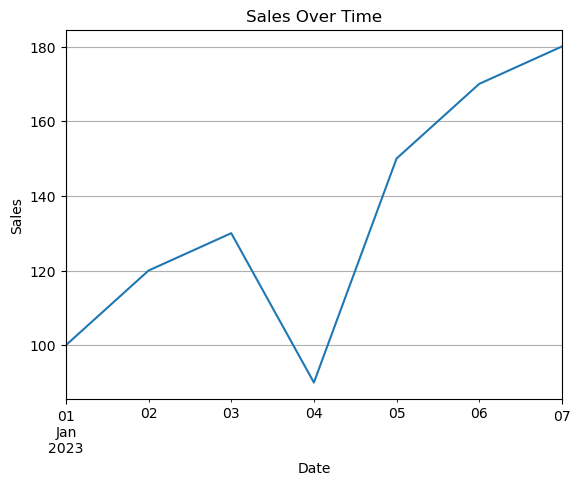

In [20]:
import matplotlib.pyplot as plt

sales.plot(title="Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
